#DETEKSI PENYAKIT TUMBUHAN BERDASARKAN DAUNNYA

##Import Libraries

In [ ]:
import tensorflow as tf
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import pathlib
from google.colab import files

##Download Dataset

In [ ]:
od.download("https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: wahyunandanicola
Your Kaggle Key: ··········


100%|██████████| 2.04G/2.04G [01:42<00:00, 21.4MB/s]


##Preparing Data

In [ ]:
import os
import tensorflow as tf
print("SEBELUM DIKURANGI KELASNYA")
list_dir = os.listdir('/content/plantvillage-dataset/plantvillage dataset/color')
print(f"ADA {len(list_dir)} KELAS")
print(list_dir)

SEBELUM DIKURANGI KELASNYA
ADA 38 KELAS
['Orange___Haunglongbing_(Citrus_greening)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Raspberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Leaf_Mold', 'Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___healthy', 'Peach___Bacterial_spot', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Tomato___healthy', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Soybean___healthy', 'Pepper,_bell___Bacterial_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Common_rust_', 'Grape___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Early_blight', 'Apple___Apple_scab', 'Potato___healthy', 'Grape___Black_rot', 'Corn_(maize)___healthy', 'Blueberry___healthy', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Apple___Black_rot', 'Potato___Late_blight', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Pepper,_bell___healthy', 'Toma

In [ ]:
os.listdir('/content/plantvillage-dataset/plantvillage dataset/color')

['Orange___Haunglongbing_(Citrus_greening)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Raspberry___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold',
 'Tomato___Target_Spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Peach___healthy',
 'Peach___Bacterial_spot',
 'Tomato___Early_blight',
 'Apple___Cedar_apple_rust',
 'Tomato___healthy',
 'Apple___healthy',
 'Cherry_(including_sour)___healthy',
 'Soybean___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Common_rust_',
 'Grape___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Potato___Early_blight',
 'Apple___Apple_scab',
 'Potato___healthy',
 'Grape___Black_rot',
 'Corn_(maize)___healthy',
 'Blueberry___healthy',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Apple___Black_rot',
 'Potato___Late_blight',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Pepper,_bell___healthy',
 'Tomato___B

In [ ]:
base_dir ='/content/plantvillage-dataset/plantvillage dataset/color'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
list_use_class = ["Apple", "Corn_(maize)", "Grape"]
list_not_use_class = []
for name_dir in os.listdir('/content/plantvillage-dataset/plantvillage dataset/color'):
  class_name = name_dir.split("___")[0]
  if class_name not in list_use_class:
    list_not_use_class.append(os.path.join(base_dir, name_dir))

AKAN DIHAPUS FITUR YANG TIDAK DIGUNAKAN YAITU SELAIN APPLE, GRAPE, CORN

In [ ]:
import shutil

for path_class in list_not_use_class:
  if os.path.exists(path_class):
    shutil.rmtree(path_class)

CEK BANYAK KELAS UNTUK OUTPUT MODEL

In [ ]:
len(os.listdir('/content/plantvillage-dataset/plantvillage dataset/color'))

12

BERIKUT FITUR ATAU KELAS UNTUK LIST PREDIKSI

In [ ]:
sorted(os.listdir('/content/plantvillage-dataset/plantvillage dataset/color'))

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

##IMAGE AUGMENTATION

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip= True,
                    fill_mode='nearest',
                    validation_split=0.2
                    )

train_generator = train_datagen.flow_from_directory(
                      base_dir, 
                      target_size= (150, 150),  
                      batch_size= 32,
                      shuffle = True,
                      subset = 'training',
                      class_mode= 'categorical' 
                      )


validation_generator = train_datagen.flow_from_directory(
                          base_dir, 
                          target_size= (150, 150),
                          batch_size= 32, 
                          shuffle = True,
                          subset = 'validation',
                          class_mode= 'categorical'
                          )

Found 8871 images belonging to 12 classes.
Found 2214 images belonging to 12 classes.


##MODELLING

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.applications import ResNet50


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 512)       590336    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 512)      0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.optimizers.Adam(), 
              metrics= ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
            print("\nakurasi lebih besar dari 96%. maka training berhenti!") 
            self.model.stop_training = True 
 
callbacks = myCallback()

In [ ]:
history = model.fit(
          train_generator,
          epochs=30, 
          steps_per_epoch=len(train_generator),
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          verbose=1,
          callbacks = [callbacks])

Epoch 1/30
278/278 [==============================] - 84s 264ms/step - loss: 1.8353 - accuracy: 0.3677 - val_loss: 1.2885 - val_accuracy: 0.5510
Epoch 2/30
278/278 [==============================] - 73s 262ms/step - loss: 0.9678 - accuracy: 0.6548 - val_loss: 0.6588 - val_accuracy: 0.7746
Epoch 3/30
278/278 [==============================] - 71s 257ms/step - loss: 0.6988 - accuracy: 0.7497 - val_loss: 0.5537 - val_accuracy: 0.7891
Epoch 4/30
278/278 [==============================] - 71s 256ms/step - loss: 0.5434 - accuracy: 0.8032 - val_loss: 0.4625 - val_accuracy: 0.8238
Epoch 5/30
278/278 [==============================] - 72s 258ms/step - loss: 0.4347 - accuracy: 0.8369 - val_loss: 0.3353 - val_accuracy: 0.8799
Epoch 6/30
278/278 [==============================] - 73s 262ms/step - loss: 0.3649 - accuracy: 0.8630 - val_loss: 0.3032 - val_accuracy: 0.8830
Epoch 7/30
278/278 [==============================] - 72s 258ms/step - loss: 0.3128 - accuracy: 0.8886 - val_loss: 0.2263 - val_ac

##VISUALISASI AKURASI DAN LOSS

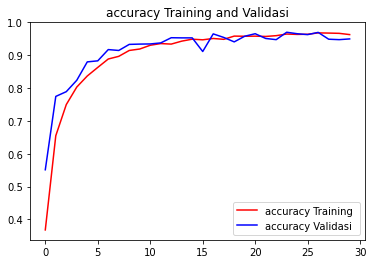

<Figure size 432x288 with 0 Axes>

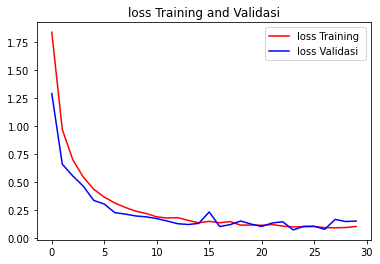

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='accuracy Training ')
plt.plot(epochs, val_acc, 'b', label='accuracy Validasi')
plt.title('accuracy Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='loss Training ')
plt.plot(epochs, val_loss, 'b', label='loss Validasi')
plt.title('loss Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

##PREDIKSI MODEL

Saving corn northen.jpg to corn northen (1).jpg
1/1 [==============================] - 0s 16ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.4132548e-12 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Corn_(maize)___Northern_Leaf_Blight


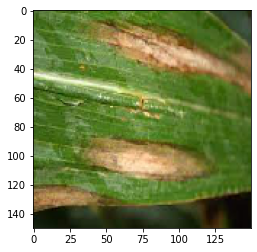

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(classes)
  if classes[0,0]==1:
   print('Apple___Apple_scab')
  elif classes[0,1]==1:
   print('Apple___Black_rot')
  elif classes[0,2]==1:
   print('Apple___Cedar_apple_rust')
  elif classes[0,3]==1:
   print('Apple___healthy')
  elif classes[0,4]==1:
   print('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')
  elif classes[0,5]==1:
   print('Corn_(maize)___Common_rust_')
  elif classes[0,6]==1:
   print('Corn_(maize)___Northern_Leaf_Blight')
  elif classes[0,7]==1:
   print('Corn_(maize)___healthy')
  elif classes[0,8]==1:
   print('Grape___Black_rot')
  elif classes[0,9]==1:
   print('Grape___Esca_(Black_Measles)')
  elif classes[0,10]==1:
   print('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)')
  elif classes[0,11]==1:
   print('Grape___healthy')
  else :
    print('tidak diketahui')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Simpat File H5

In [ ]:
from tensorflow.keras.preprocessing import image

model.save('/content/drive/MyDrive/Saved Models/plant_health.h5')